This note provides codes for the paper
- Title: An embedding structure of determinantal point process
- Authors: Hideitsu Hino and Keisuke Yano
- Journal: Information Geometry
- Year: 2024

In [3]:
# Import libraries and set-up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from dppy.finite_dpps import FiniteDPP
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# The case with the number of items 3

In [7]:
#Calculation of theta
def theta_123(u_12,u_23,u_31):
  ret1 = np.exp(u_12)+np.exp(u_23)+np.exp(u_31) +2*np.sqrt((1-np.exp(u_12))*(1-np.exp(u_23))*(1-np.exp(u_31)))-2
  ret2 = u_12+u_23+u_31
  return np.log(ret1)-ret2

#Calculation of the conditional potential
def conditionalpotential_DPP3(x,y,z,rho12,rho13,rho23):
  return x+y+z+np.log((1+np.exp(-x))*(1+np.exp(-y))* (1+np.exp(-z)) +2*rho12*rho13*rho23 -rho12**2 * (1+np.exp(-z)) -rho13**2 * (1+np.exp(-y)) -rho23**2 * (1+np.exp(-x)) )

**Concordance between our formula and MCMC in the calclation of probabilities**

In [5]:
rholist = [0.01*i for i in range(1,100)]

#MCMC samples from DPP with L
MCMCres_123 = []
MCMCres_12  = []
MCMCres_3   = []
for rho in rholist:
  L = np.array([[1, rho, 0.5],
                [rho, 1, 0.5],
                [0.5, 0.5, 1]])
  dpp = FiniteDPP(kernel_type='likelihood', projection=False, L=L)
  sampled_points = []
  N = 10000
  for _ in range(N):
    dpp.sample_exact()
  sampled_points=dpp.list_of_samples
  MCMCres_123.append(sum(np.array([len(sampled_points[i]) for i in range(N)])==3)/N)
  MCMCres_12.append(sum(np.array([set(sampled_points[i]) == set([0,1]) for i in range(N)]))/N)
  MCMCres_3.append(sum(np.array([set(sampled_points[i]) == set([3])  for i in range(N)]))/N)

In [8]:
predform_123=[np.exp(0 + np.log(1-(rho)**2) + np.log(1-(0.5)**2) + np.log(1-(0.5)**2)+theta_123(np.log(1-(rho)**2),np.log(1-(0.5)**2),np.log(1-(0.5)**2))-conditionalpotential_DPP3(0,0,0,rho,0.5,0.5)) for rho in rholist]
predform_12=[np.exp(0 + np.log(1-(rho)**2) -conditionalpotential_DPP3(0,0,0,rho,0.5,0.5)) for rho in rholist]
predform_3=[np.exp(0 -conditionalpotential_DPP3(0,0,0,0.5,rho,0.5)) for rho in rholist]

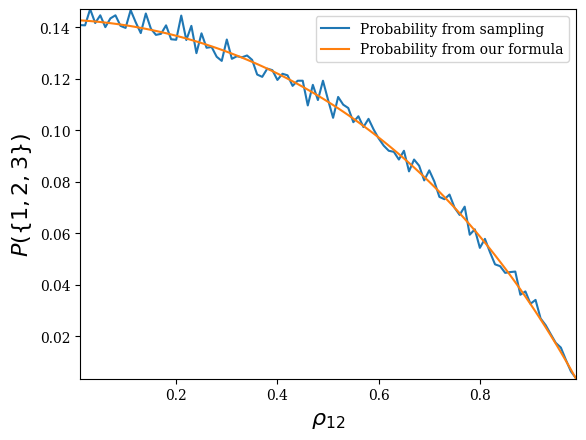

In [10]:
plt.plot(rholist,MCMCres_12,label="Probability from sampling")
plt.plot(rholist,predform_12,label="Probability from our formula")
plt.xlabel(r"$\rho_{12}$",fontsize=16)
plt.ylabel(r"$P(\{1,2,3\})$",fontsize=16)
plt.legend()

**Shape of $\theta^{\{1,2,3\}}$**

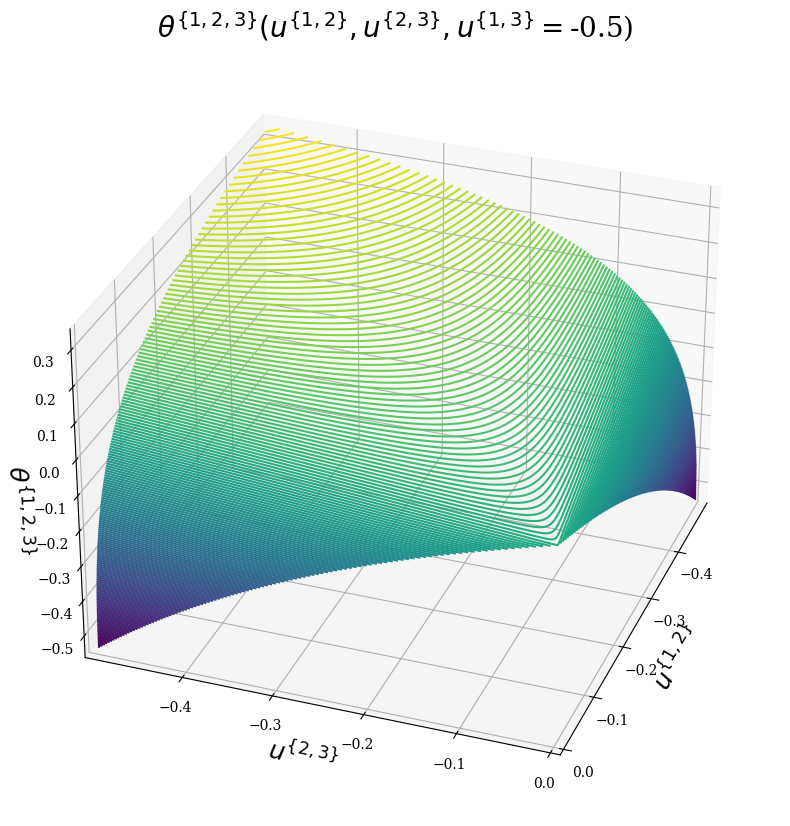

In [13]:
u13=-0.5

fig= plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=20)
ax.set_xlabel(r'$u^{\{1,2\}}$',fontsize=18)
ax.set_ylabel(r'$u^{\{2,3\}}$',fontsize=18)
ax.set_zlabel(r'$\theta^{\{1,2,3\}}$',fontsize=18)
ax.set_title(r"$\theta^{\{1,2,3\}}(u^{\{1,2\}},u^{\{2,3\}},u^{\{1,3\}}=$"+str(np.round(u13,3))+")",fontsize=20)
Xs = np.array([-0.001*i for i in range(500)])
Ys = np.array([-0.001*i for i in range(500)])
Zs = np.array([[theta_123(x,y,u13) for x in Xs] for y in Ys])
ax.contour3D(Xs,Ys,Zs,200,
                  cmap='viridis')

# 新しいセクション

In [15]:
def conditionalpotential_DPP2(x,y,z):
  return x+y+np.log(np.exp(z)+np.exp(-x)+np.exp(-y)+np.exp(-x-y))

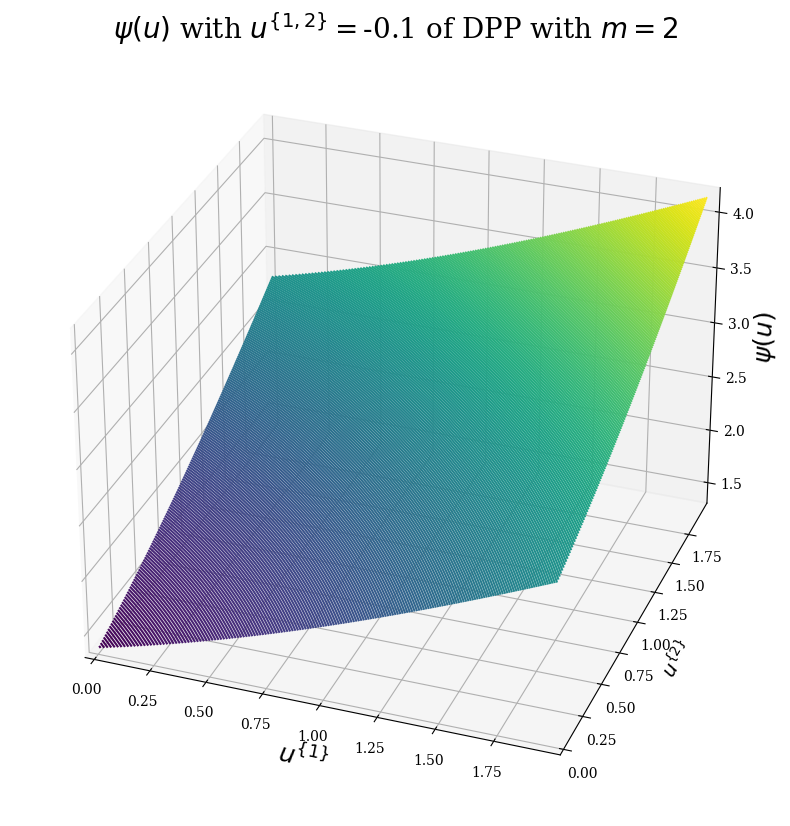

In [16]:
u12 = -0.1
fig= plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=290)
ax.set_xlabel(r'$u^{\{1\}}$',fontsize=18)
ax.set_ylabel(r'$u^{\{2\}}$',fontsize=14)
ax.set_zlabel(r'$\psi(u)$',fontsize=18)
ax.set_title(r"$\psi(u)$"+" with "+r"$u^{\{1,2\}}=$"+str(u12)+" of DPP with "+r"$m=2$",fontsize=20)
Xs = np.array([0.01*i for i in range(0,200)])
Ys = np.array([0.01*i for i in range(0,200)])
Zs = np.array([[conditionalpotential_DPP2(x,y,z=u12) for x in Xs] for y in Ys])
ax.contour3D(Xs,Ys,Zs,400,
                  cmap='viridis')